In [1]:
import tarfile
from six.moves import urllib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import hashlib
import json
#import jsonlines
import ast

In [2]:
train = pd.read_csv('bank-full.csv', sep=';')

In [3]:
train.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
yes_loan = train[train.y != 'no']
len(yes_loan)

5289

In [5]:
g_yes_loan = yes_loan.groupby('job').count()
g_yes_loan

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631,631
blue-collar,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708
entrepreneur,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
housemaid,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
management,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301,1301
retired,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516,516
self-employed,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187
services,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369,369
student,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269,269


In [6]:
g_total = train.groupby('job').count()
g_total

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
job,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


In [7]:
Percentage = (g_yes_loan.y/g_total.y)*100

In [8]:
g_yes_loan = g_yes_loan.assign(Percentage=Percentage)

In [9]:
g_yes_loan = g_yes_loan.drop(['age','marital','education','default','balance', 'housing', 'loan', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)

# Q1: Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

In [10]:
g_yes_loan.sort_values(by=['Percentage'], ascending=False)

,Percentage
job,
student,28.678038
retired,22.791519
unemployed,15.502686
management,13.755551
admin.,12.202669
self-employed,11.842939
unknown,11.805556
technician,11.056996
services,8.883004


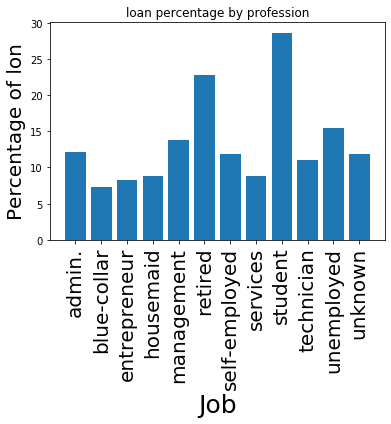

In [11]:
index = np.arange(len(g_yes_loan))
plt.bar(index, g_yes_loan.Percentage)
plt.xlabel('Job', fontsize=25)
plt.ylabel('Percentage of lon', fontsize=20)
plt.xticks(index, g_yes_loan.index, fontsize=20, rotation=90)
plt.title('loan percentage by profession')
plt.show()

##################################

In [12]:
yes_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


<function matplotlib.pyplot.show(*args, **kw)>

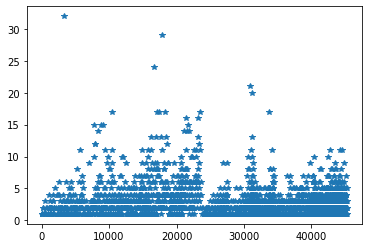

In [13]:
plt.plot(yes_loan.campaign,'*')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

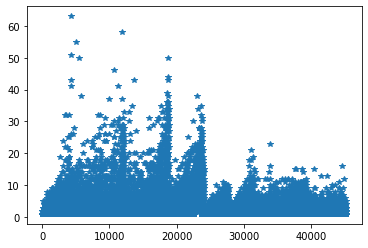

In [14]:
no_loan = train[train.y != 'yes']
plt.plot(no_loan.campaign,'*')
plt.show

In [15]:
len(yes_loan.campaign)

5289

In [16]:
sum(yes_loan.campaign >= 7)

161

# Q2: Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

In [17]:
(sum(yes_loan.campaign >= 4)/len(yes_loan.campaign))*100

13.405180563433541

# Q3: Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

##############################

<function matplotlib.pyplot.show(*args, **kw)>

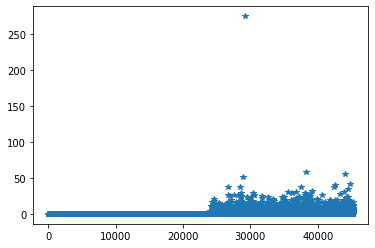

In [18]:
plt.plot(train.previous,'*')
plt.show

In [19]:
sum(train.previous > 0)

8257

In [20]:
sum(yes_loan.previous > 0)

1905

# Q4: O resultado da campanha anterior tem relevância na campanha atual?

In [21]:
(sum(yes_loan.previous > 0)/sum(train.previous > 0))*100

23.07133341407291

#################################

########################################

# Q6: Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [22]:
yes_housing = train[train.housing != 'no']

In [23]:
len_yes = len(yes_housing)

<function matplotlib.pyplot.show(*args, **kw)>

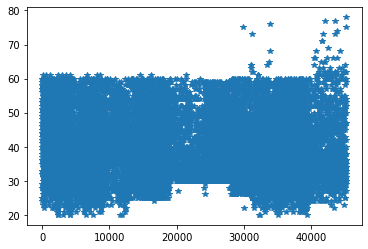

In [24]:
plt.plot(yes_housing.age,'*')
plt.show

In [25]:
yes_housing_age = yes_housing

In [26]:
l = len(yes_housing_age)
for i in range(l):
    if (yes_housing_age.iloc[i,0] <= 30):
        yes_housing_age.iloc[i,0] = 1
    elif (yes_housing_age.iloc[i,0] > 30) and (yes_housing_age.iloc[i,0] < 60):
        yes_housing_age.iloc[i,0] = 2
    else:
        yes_housing_age.iloc[i,0] = 3

/Users/aurelianosancho/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
g_age = yes_housing_age.groupby('age').count()
g_age = g_age.sort_values(by=['housing'], ascending=False)
g_age.housing = (g_age.housing/len_yes)*100
g_age = g_age.drop(['job','marital','education','default','balance', 'loan', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_age

,housing
age,
2,82.821329
1,16.116196
3,1.062475


In [28]:
g_job = yes_housing.groupby('job').count()
g_job.housing = (g_job.housing/len_yes)*100
g_job = g_job.drop(['age','marital','education','default','balance', 'loan', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_job.sort_values(by=['housing'], ascending=False)

,housing
job,
blue-collar,28.046160
management,18.615201
technician,16.374851
admin.,12.662157
services,11.006765
entrepreneur,3.458018
self-employed,3.044170
unemployed,2.160764
retired,1.953840


In [29]:
g_marital = yes_housing.groupby('marital').count()
g_marital.housing = (g_marital.housing/len_yes)*100
g_marital = g_marital.drop(['job','education','default','balance', 'loan', 'contact', 'day', 'month', 'age',
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_marital.sort_values(by=['housing'], ascending=False)

,housing
marital,
married,60.966972
single,27.465181
divorced,11.567847


In [30]:
g_education = yes_housing.groupby('education').count()
g_education.housing = (g_education.housing/len_yes)*100
g_education = g_education.drop(['job','marital','default','balance', 'loan', 'contact', 'day', 'month', 'age', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_education.sort_values(by=['housing'], ascending=False)

,housing
education,
secondary,55.861520
tertiary,25.380024
primary,15.495424
unknown,3.263032


<function matplotlib.pyplot.show(*args, **kw)>

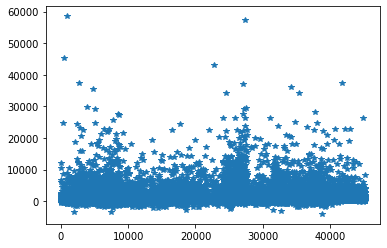

In [31]:
plt.plot(yes_housing.balance,'*')
plt.show

In [32]:
yes_housing_balance = yes_housing

In [33]:
l = len(yes_housing_balance)
for i in range(l):
    if (yes_housing_balance.iloc[i,5] < 0):
        yes_housing_balance.iloc[i,5] = 1
    elif (yes_housing_balance.iloc[i,5] >= 0) and (yes_housing_balance.iloc[i,5] < 50):
        yes_housing_balance.iloc[i,5] = 2
    elif (yes_housing_balance.iloc[i,5] >= 50) and (yes_housing_balance.iloc[i,5] < 200):
        yes_housing_balance.iloc[i,5] = 3
    elif (yes_housing_balance.iloc[i,5] >= 200) and (yes_housing_balance.iloc[i,5] < 500):
        yes_housing_balance.iloc[i,5] = 4
    elif (yes_housing_balance.iloc[i,5] >= 500) and (yes_housing_balance.iloc[i,5] < 1000):
        yes_housing_balance.iloc[i,5] = 5
    elif (yes_housing_balance.iloc[i,5] >= 1000) and (yes_housing_balance.iloc[i,5] < 10000):
        yes_housing_balance.iloc[i,5] = 6
    else:
        yes_housing_balance.iloc[i,5] = 7

In [34]:
g_balance = yes_housing_balance.groupby('balance').count()
g_balance.housing = (g_balance.housing/len_yes)*100
g_balance = g_balance.drop(['job','marital','education','default', 'loan', 'contact', 'day', 'month', 'age',
              'duration', 'campaign','pdays', 'previous', 'poutcome','y'], axis=1)
g_balance.sort_values(by=['housing'], ascending=False)

,housing
balance,
6,28.300836
4,18.157581
5,15.961003
2,12.877039
3,12.419419
1,10.895344
7,1.388778


In [36]:
g_loan = yes_housing.groupby('loan').count()
g_loan.housing = (g_loan.housing/len_yes)*100
g_loan = g_loan.drop(['job','marital','education','default','balance', 'contact', 'day', 'month', 
              'duration', 'campaign','pdays', 'previous', 'poutcome','y','age'], axis=1)
g_loan.sort_values(by=['housing'], ascending=False)

,housing
loan,
no,82.622364
yes,17.377636


# Fim